In [1]:
# libraries
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# use svg in notebook
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


In [2]:
with open('domain-allocation-trends.json') as infile:
    positions = json.load(infile)
positions


{'positions': [{'name': 'IT Development Program - 4 rotations',
   'years': 2,
   'allocations': {'cloud': 25, 'data': 25, 'security': 50}},
  {'name': 'Junior Solutions Architect - architecture team',
   'years': 3,
   'allocations': {'software': 40, 'cloud': 40, 'security': 20}},
  {'name': 'Cloud Engineer - build cloud team',
   'years': 1.5,
   'allocations': {'cloud': 75, 'security': 25}},
  {'name': 'Cloud Engineer - build cloud data team',
   'years': 1.5,
   'allocations': {'cloud': 25, 'data': 50, 'security': 25}},
  {'name': 'Senior Software Engineer - external APIs',
   'years': 0.75,
   'allocations': {'software': 70, 'cloud': 20, 'security': 10}}]}

In [3]:
allocation_months = []

# easier to read than nested list comprehensions!
for position in positions['positions']:
    for _ in range(int(position['years'] * 12)):
        allocation_months.append(position['allocations'])

df = pd.DataFrame(allocation_months)
df.shape


(105, 4)

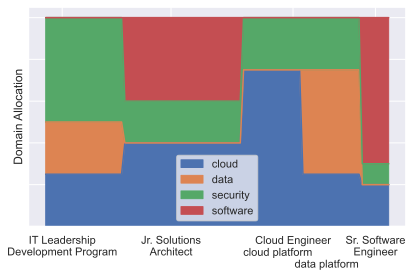

In [4]:
sns.set_theme()
ax = df.plot(kind='area', stacked=True)

ax.set(xlabel="", ylabel="Domain Allocation")
ax.yaxis.set_tick_params(labelleft=False)

ax.xaxis.set_ticks(
    [5, 38, 75, 100],
    ['IT Leadership\nDevelopment Program',
     'Jr. Solutions\nArchitect',
     'Cloud Engineer\ncloud platform          \n                      data platform',
     'Sr. Software\nEngineer']
)

plt.tight_layout()
plt.show()


In [5]:
ax.get_figure().savefig('2023-daniel-adams-domain-allocation-trends.svg', facecolor='w')
